In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa
import sys
import matplotlib as mpl

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")


mpl.rcParams["figure.dpi"] = 100

sys.path.append("../scripts")
from plot import get_price_duration

In [28]:
n0 = pypsa.Network("../../results/20240506-single/network_solved_LT-country+DE-voll+true-zero_cost_storage+true-battery+false.nc")
n1 = pypsa.Network("../../results/20240506-single/network_solved_LT-country+DE-voll+true-battery+false.nc")
n2 = pypsa.Network("../../results/20240506-single/network_solved_LT-country+DE-voll+true.nc")

INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-zero_cost_storage+true-battery+false.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-battery+false.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true.nc has buses, carriers, generators, links, stores


In [34]:
n0_pdc = get_price_duration(n0)
n1_pdc = get_price_duration(n1)
n2_pdc = get_price_duration(n2)

In [37]:
n0_svd = get_price_duration(n0, "hydrogen")
n1_svd = get_price_duration(n1, "hydrogen")
n2_svd = get_price_duration(n2, "hydrogen")

n2_svd_battery = get_price_duration(n2, "battery")

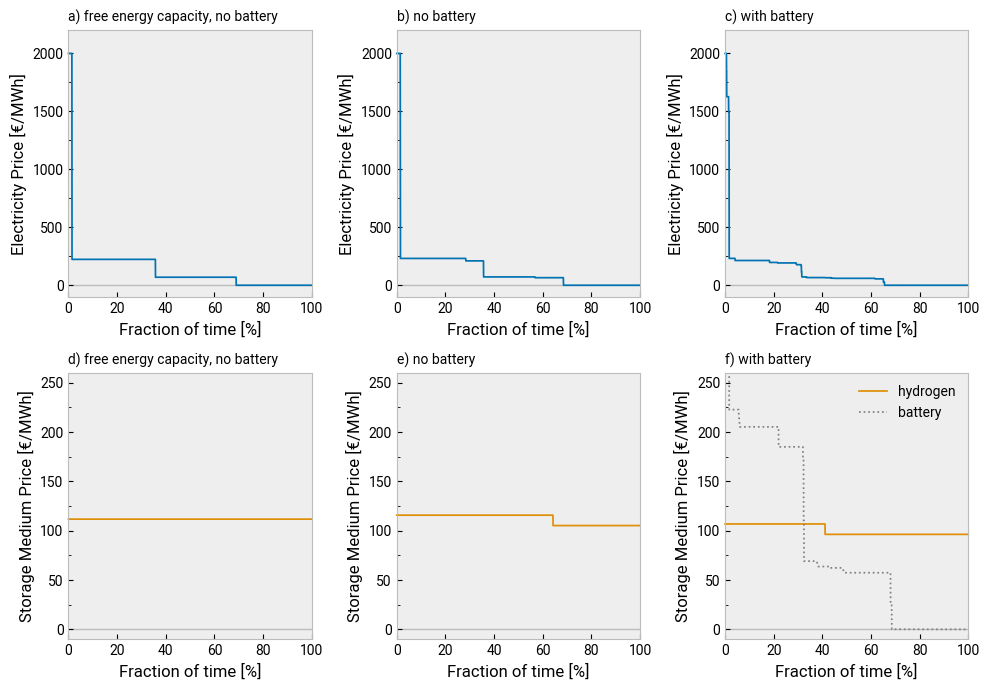

In [45]:
cat_colors = sns.color_palette("colorblind")

fig, axs = plt.subplots(2, 3, figsize=(10, 7))

kwargs = dict(color=cat_colors[0], clip_on=False, linewidth=1.25)
n0_pdc.plot(ax=axs[0, 0], **kwargs)
n1_pdc.plot(ax=axs[0, 1], **kwargs)
n2_pdc.plot(ax=axs[0, 2], **kwargs)

kwargs = dict(color=cat_colors[1], clip_on=False, linewidth=1.25)
n0_svd.plot(ax=axs[1, 0], **kwargs)
n1_svd.plot(ax=axs[1, 1], **kwargs)
n2_svd.plot(ax=axs[1, 2], **kwargs)

n2_svd_battery.plot(ax=axs[1, 2], color='grey', linestyle=":", linewidth=1.25, label='battery')
axs[1, 2].legend(loc="upper right")


kwargs = dict(loc="left", fontsize="medium")
axs[0, 0].set_title("a) free energy capacity, no battery", **kwargs)
axs[0, 1].set_title("b) no battery", **kwargs)
axs[0, 2].set_title("c) with battery", **kwargs)
axs[1, 0].set_title("d) free energy capacity, no battery", **kwargs)
axs[1, 1].set_title("e) no battery", **kwargs)
axs[1, 2].set_title("f) with battery", **kwargs)

for i in range(3):
    axs[0, i].set_ylim(-100, 2200)
    axs[0, i].set_ylabel("Electricity Price [€/MWh]")
    axs[0, i].set_yticks(range(0, 2001, 250), minor=True)

for i in range(3):
    axs[1, i].set_ylim(-10, 260)
    axs[1, i].set_ylabel("Storage Medium Price [€/MWh]")
    axs[1, i].set_yticks(range(0, 251, 25), minor=True)

for i in range(2):
    for j in range(3):
        axs[i, j].set_xlabel("Fraction of time [%]")
        axs[i, j].axhline(0, linewidth=1, color="#bbb", zorder=0)
        axs[i, j].set_xlim(0, 100)

for ext in ["png", "pdf"]:
    plt.savefig(f"../../figures/figure-example.{ext}", bbox_inches="tight", dpi=300)

In [33]:
n0.snapshots

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-12-31 14:00:00', '2020-12-31 15:00:00',
               '2020-12-31 16:00:00', '2020-12-31 17:00:00',
               '2020-12-31 18:00:00', '2020-12-31 19:00:00',
               '2020-12-31 20:00:00', '2020-12-31 21:00:00',
               '2020-12-31 22:00:00', '2020-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8784, freq=None)